In [1]:
import numpy as np
import matplotlib as mpl
import pandas as pd
from numpy.random import multivariate_normal
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import mixture
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons,make_blobs,make_circles
from sklearn.metrics import accuracy_score

A couple of helper functions we can use:

In [2]:
def sample_2d_gaussian(meanx,meany,variance_x,variance_y,covariance,numsamps):
    '''
    Generates a random sample of size 'numsamps' from a 2-dimensional Gaussian distribution.
    The Gaussian is defined by the mean vector (meanx,meany) and the 
    covariance matrix
    
    variance_x    covariance
    covariance    variance_y
    
    All parameters can be freely chosen, except covariance, which must satisfy the inequality
    
    covariance <= sqrt(variance_x * variance_y)
    '''
    meanvec = np.array([meanx,meany])
    covarmatrix = np.array([[variance_x,covariance],[covariance,variance_y]])
    return multivariate_normal(meanvec,covarmatrix,numsamps)


def maxpos(A):
    '''
    Takes an n x k array A, and returns 1-dim n array where the i'th
    entry is the index of column in A where the i'th row of A has its
    maximal value (application: turns a probabilitiy distribution over
    k classes for n instances into a single prediction)
    '''
    return np.argmax(A,axis=1)
    

### Part 1: Decision regions for simple 2 dimensional datasets

Loading/generating data: following are several alternative ways to get data consisting of the input features stored in 'features', and the class labels, stored in 'labels'.  Only execute one of the data generating cells, before moving on to the following code!

**A**: sampling data from 2-dimensional Gaussian distributions. For reproducibility, one can fix a random seed.

In [3]:
np.random.seed(1)
datasize=250
mixturecoeff=np.array([0.4,0.2,0.4])
componentsizes=(datasize*mixturecoeff).astype(int)

class0samp=sample_2d_gaussian(1,2,0,1,0,componentsizes[0])
class1samp=sample_2d_gaussian(3,2,0.4,0,0,componentsizes[1])
class2samp=sample_2d_gaussian(5,2,0,1,0,componentsizes[2])

# Winner (so far)
# class0samp=sample_2d_gaussian(0,0,1,1,0,componentsizes[0])
# class1samp=sample_2d_gaussian(5,5,2,2,0,componentsizes[1])
# class2samp=sample_2d_gaussian(15,5,3,3,0,componentsizes[2])
  
features=np.concatenate((class0samp,class1samp,class2samp),axis=0)
labels=np.concatenate((np.zeros(componentsizes[0]),np.ones(componentsizes[1]),2*np.ones(componentsizes[2])))         

**B**: Loading mi.txt data:

In [4]:
midata = pd.read_csv("MI-labeled.txt", sep=',')
features = np.array(midata[['X1','X2']])
classlabels=midata['Class']
labels = np.zeros(len(classlabels))
for i in range(len(classlabels)):
    if classlabels[i] == 'I':
        labels[i]=1

Plotting the data with labels indicated by color:

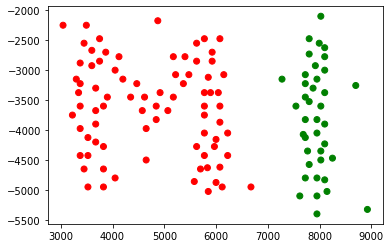

In [5]:
plt.scatter(features[:,0],features[:,1],c=labels, cmap = mpl.colors.ListedColormap(['r', 'b','g']))
plt.show()

Preparing meshgrid for plotting decision regions:

In [6]:
maxvalx = np.max(features[:,0])
maxvaly = np.max(features[:,1])
minvalx = np.min(features[:,0])
minvaly = np.min(features[:,1])
border=2
xinterval = (maxvalx-minvalx)/border
yinterval = (maxvaly-minvaly)/border
xx, yy = np.meshgrid(np.arange(minvalx-xinterval, maxvalx+xinterval, xinterval/100), np.arange(minvaly-yinterval, maxvaly+yinterval, yinterval/100))
      

Learning a classifier -- uncomment to select the classification model to use.

In [7]:
#model=LinearDiscriminantAnalysis()
#model = LogisticRegression()
model = SVC(kernel='linear')

model.fit(features,labels)

SVC(kernel='linear')

Applying model to the meshgrid. All models return a quantitative "likelihood" for the different classes. For the probabilistic models, these are class label probabilities that are retrieved using the `.predict_proba` method. For the non-probabilistic SVC model, this is the `decision_function` method. In all cases, we classify a datapoint as belonging to the class with the maximal "likelihood" value.

In [8]:
#Z=model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z=model.decision_function(np.c_[xx.ravel(), yy.ravel()])
#meshclasses = maxpos(Z)
meshclasses = np.ones(Z.size)
#meshclasses[Z<0]=0
meshclasses = meshclasses.reshape(xx.shape)

Plotting datapoints and decision regions

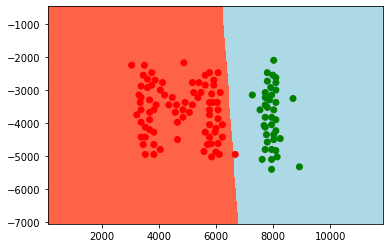

In [9]:
model=LinearDiscriminantAnalysis()
model.fit(features,labels)

Z=model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
meshclasses = maxpos(Z)
meshclasses = meshclasses.reshape(xx.shape)

plt.contourf(xx,yy,meshclasses,[-0.1,0.1,1,2],colors=('tomato','lightblue','lightgreen'))
plt.scatter(features[:,0],features[:,1],c=labels, cmap = mpl.colors.ListedColormap(['r', 'b','g']))
#plt.scatter(data[:,0],data[:,1],c=classlabels_numeric, cmap = mpl.colors.ListedColormap(['r', 'b']))
plt.show()

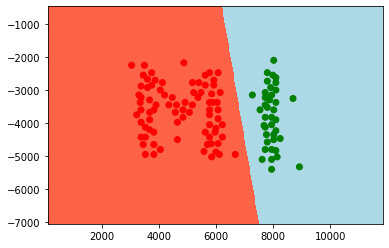

In [10]:
model=LogisticRegression()
model.fit(features,labels)

Z=model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
meshclasses = maxpos(Z)
meshclasses = meshclasses.reshape(xx.shape)

plt.contourf(xx,yy,meshclasses,[-0.1,0.1,1,2],colors=('tomato','lightblue','lightgreen'))
plt.scatter(features[:,0],features[:,1],c=labels, cmap = mpl.colors.ListedColormap(['r', 'b','g']))
#plt.scatter(data[:,0],data[:,1],c=classlabels_numeric, cmap = mpl.colors.ListedColormap(['r', 'b']))
plt.show()

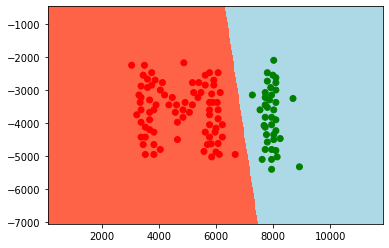

In [11]:
model=SVC(kernel='linear')
model.fit(features,labels)

Z=model.decision_function(np.c_[xx.ravel(), yy.ravel()])
meshclasses = np.ones(Z.size)
meshclasses[Z<0]=0
meshclasses = meshclasses.reshape(xx.shape)

plt.contourf(xx,yy,meshclasses,[-0.1,0.1,1,2],colors=('tomato','lightblue','lightgreen'))
plt.scatter(features[:,0],features[:,1],c=labels, cmap = mpl.colors.ListedColormap(['r', 'b','g']))
#plt.scatter(data[:,0],data[:,1],c=classlabels_numeric, cmap = mpl.colors.ListedColormap(['r', 'b']))
plt.show()

We also calculate the predictions on the (training) datapoints, and check the accuracy:

In [12]:
pred_labels=model.predict(features)
print("Accuracy: {}".format(accuracy_score(labels,pred_labels)))

Accuracy: 1.0


**Exercise 1**: Experiment with the three classifiers Linear Discriminant Analysis, Logistic Regression, and linear support vector machines. Use the MI data, and different mixtures of Gaussians you create by varying the parameters in `sample_2d_gaussian'. 

For the Gaussian mixture data:

Create one or several linearly separable Gaussian mixture datasets (can be with only two components) for which some of the models give a perfect separation of the classes, and others don't (this is related to Exercise 4 in self study 1). 

- Exploiting the fact that LDA requires same covariance matrices, and then here making them extremely different
- The others are not affect by this


Create separate test sets using the same parameters for the Gaussian mixture as in the creation of the training set. Can you create a test/train dataset and find classifiers A and B, such that A is better than B on the training data, but B is better than A on the test set? Why is this not such an easy task for the datasets and classifiers we consider her?

Enough test data points with high variance that there is high enough chance they are outside the learned regions. 

For the MI data:

explain the structure of the decision regions you find for the different classifiers.


In [13]:
np.random.seed(1)
datasize=1000
mixturecoeff=np.array([0.4,0.2,0.4])
componentsizes=(datasize*mixturecoeff).astype(int)

class0train=sample_2d_gaussian(0,2,1,1,0,componentsizes[0])
class1train=sample_2d_gaussian(3,2,0.4,0.4,0,componentsizes[1])
class2train=sample_2d_gaussian(6,2,1,1,0,componentsizes[2])

class0test=sample_2d_gaussian(0,2,1,1,0,3*componentsizes[0])
class1test=sample_2d_gaussian(3,2,0.4,0.4,0,3*componentsizes[1])
class2test=sample_2d_gaussian(6,2,1,1,0,3*componentsizes[2])

train_features=np.concatenate((class0train,class1train,class2train),axis=0)
train_labels=np.concatenate((np.zeros(componentsizes[0]),np.ones(componentsizes[1]),2*np.ones(componentsizes[2])))

test_features=np.concatenate((class0test,class1test,class2test),axis=0)
test_labels=np.concatenate((np.zeros(3*componentsizes[0]),np.ones(3*componentsizes[1]),2*np.ones(3*componentsizes[2])))

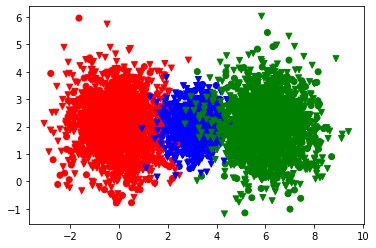

In [14]:
plt.scatter(train_features[:,0],train_features[:,1],c=train_labels, cmap = mpl.colors.ListedColormap(['r', 'b','g']))
plt.scatter(test_features[:,0],test_features[:,1],c=test_labels, cmap = mpl.colors.ListedColormap(['r', 'b','g']),marker="v")
plt.show()

In [15]:
maxvalx = np.max(train_features[:,0])
maxvaly = np.max(train_features[:,1])
minvalx = np.min(train_features[:,0])
minvaly = np.min(train_features[:,1])
border=2
xinterval = (maxvalx-minvalx)/border
yinterval = (maxvaly-minvaly)/border
xx, yy = np.meshgrid(np.arange(minvalx-xinterval, maxvalx+xinterval, xinterval/100), np.arange(minvaly-yinterval, maxvaly+yinterval, yinterval/100))

In [16]:
lda=LinearDiscriminantAnalysis()
logr = LogisticRegression()
svm = SVC(kernel='linear')

lda.fit(train_features,train_labels)
logr.fit(train_features,train_labels)
svm.fit(train_features,train_labels)

SVC(kernel='linear')

In [17]:
lda_Z=lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
logr_Z=logr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
svm_Z=svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
lda_meshclasses = maxpos(lda_Z)
logr_meshclasses = maxpos(logr_Z)
svm_meshclasses = maxpos(svm_Z)
#meshclasses = np.ones(Z.size)
#meshclasses[Z<0]=0
lda_meshclasses = lda_meshclasses.reshape(xx.shape)
logr_meshclasses = logr_meshclasses.reshape(xx.shape)
svm_meshclasses = svm_meshclasses.reshape(xx.shape)

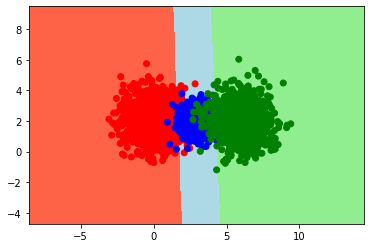

In [18]:
plt.contourf(xx,yy,lda_meshclasses,[-0.1,0.1,1,2],colors=('tomato','lightblue','lightgreen'))
plt.scatter(test_features[:,0],test_features[:,1],c=test_labels, cmap = mpl.colors.ListedColormap(['r', 'b','g']))
#plt.scatter(data[:,0],data[:,1],c=classlabels_numeric, cmap = mpl.colors.ListedColormap(['r', 'b']))
plt.show()


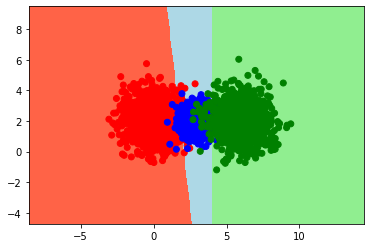

In [19]:
plt.contourf(xx,yy,logr_meshclasses,[-0.1,0.1,1,2],colors=('tomato','lightblue','lightgreen'))
plt.scatter(test_features[:,0],test_features[:,1],c=test_labels, cmap = mpl.colors.ListedColormap(['r', 'b','g']))
#plt.scatter(data[:,0],data[:,1],c=classlabels_numeric, cmap = mpl.colors.ListedColormap(['r', 'b']))
plt.show()

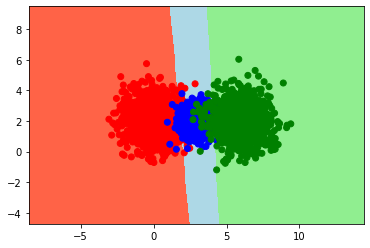

In [20]:
plt.contourf(xx,yy,svm_meshclasses,[-0.1,0.1,1,2],colors=('tomato','lightblue','lightgreen'))
plt.scatter(test_features[:,0],test_features[:,1],c=test_labels, cmap = mpl.colors.ListedColormap(['r', 'b','g']))
#plt.scatter(data[:,0],data[:,1],c=classlabels_numeric, cmap = mpl.colors.ListedColormap(['r', 'b']))
plt.show()

In [21]:
lda_train_pred_labels=lda.predict(train_features)
lda_test_pred_labels=lda.predict(test_features)

logr_train_pred_labels=logr.predict(train_features)
logr_test_pred_labels=logr.predict(test_features)

svm_train_pred_labels=svm.predict(train_features)
svm_test_pred_labels=svm.predict(test_features)

print("LDA: Train Accuracy: {}, Test Accuracy: {}".format(accuracy_score(train_labels,lda_train_pred_labels), accuracy_score(test_labels,lda_test_pred_labels)))
print("LOGR: Train Accuracy: {}, Test Accuracy: {}".format(accuracy_score(train_labels,logr_train_pred_labels), accuracy_score(test_labels,logr_test_pred_labels)))
print("SVM: Train Accuracy: {}, Test Accuracy: {}".format(accuracy_score(train_labels,svm_train_pred_labels), accuracy_score(test_labels,svm_test_pred_labels)))

LDA: Train Accuracy: 0.961, Test Accuracy: 0.9536666666666667
LOGR: Train Accuracy: 0.96, Test Accuracy: 0.956
SVM: Train Accuracy: 0.961, Test Accuracy: 0.9563333333333334


### Part 2: the California Housing data

We next investigate some "real" data: the California housing dataset contains attributes characterizing houses in different "blocks" of California, and the median house value in these blocks. The usual machine learning problem for this dataset is the regression problem of predicting the median value. We can turn it into a binary prediction problem whether the median value is above the median (of the median values). 

The `fetch_california_housing` function returns the dataset in the form of a dictionary with attributes DESCR, data, and target.

In [22]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing()


print(california_housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

For a first illustration, we plot the datapoints by geographic coordinates with color coded median house prices:

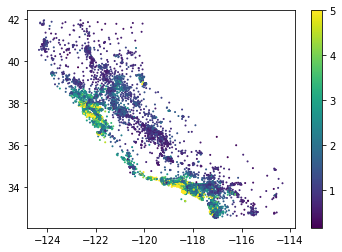

In [23]:
plt.scatter(california_housing['data'][:,7],california_housing['data'][:,6],s=1,c=california_housing['target'])
plt.colorbar()
plt.show()

We generate our binary labels, and create a train/test split:

In [24]:
labels = np.array([1 if y > np.median(california_housing['target']) else 0 for y in california_housing['target']])
features = california_housing['data']
features_train,features_test,labels_train,labels_test = train_test_split(features,labels)

After this discretization the data looks as follows (showing the full data, not train or test splits):

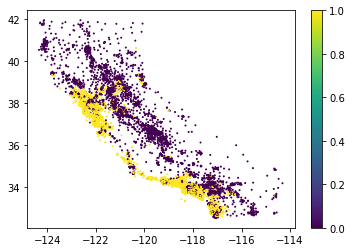

In [25]:
plt.scatter(california_housing['data'][:,7],california_housing['data'][:,6],s=1,c=labels)
plt.colorbar()
plt.show()

One can directly see that the coordinates are already pretty good predictors, though clearly not allowing for linear separbility. We investigate how good a model we get by using all features and different model classes: 

In [26]:
model=LinearDiscriminantAnalysis()

model.fit(features_train,labels_train)
pred_labels_train=model.predict(features_train)
pred_labels_test=model.predict(features_test)

print("Accuracy train: {}".format(accuracy_score(labels_train,pred_labels_train)))
print("Accuracy test: {}".format(accuracy_score(labels_test,pred_labels_test)))

Accuracy train: 0.8217054263565892
Accuracy test: 0.8114341085271318


In [27]:
model = LogisticRegression()

model.fit(features_train,labels_train)
pred_labels_train=model.predict(features_train)
pred_labels_test=model.predict(features_test)

print("Accuracy train: {}".format(accuracy_score(labels_train,pred_labels_train)))
print("Accuracy test: {}".format(accuracy_score(labels_test,pred_labels_test)))

Accuracy train: 0.81343669250646
Accuracy test: 0.8083333333333333


c:\Users\chris\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
# Runs for forever
# model = SVC(kernel='linear')

# model.fit(features_train,labels_train)
# pred_labels_train=model.predict(features_train)
# pred_labels_test=model.predict(features_test)

# print("Accuracy train: {}".format(accuracy_score(labels_train,pred_labels_train)))
# print("Accuracy test: {}".format(accuracy_score(labels_test,pred_labels_test)))

**Exercise 2**: Try the different models on the California housing data. Which one is doing best in terms of test accuracy?

Inspect the following attributes of the learned models:


LDA: `means_` <br>
Logistic regression: `coef_` <br>
SVC: `coef_`<br>

Check the online documentation about the meaning of these attributes. How can the values of these attributes be used for explaining the classification model? Which of the input features are most important for the prediction? 

LDA means: the means for the gaussians

Logistic regression coef: weights for features

SVC coef: weights for features when kernel is linear

For this investigation it may be helpful to normalize the data before building the classifiers, using the code in the cell below (why is this useful?).



In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features_train)
features_train_norm=scaler.transform(features_train)
features_test_norm=scaler.transform(features_test)

features_train

array([[   3.2645    ,   52.        ,    4.08664773, ...,    1.68465909,
          34.08      , -118.35      ],
       [   3.5521    ,   17.        ,    3.98883929, ...,    3.72991071,
          34.22      , -118.37      ],
       [   1.7958    ,   17.        ,    4.1464497 , ...,    4.09467456,
          32.56      , -117.06      ],
       ...,
       [   5.0362    ,   29.        ,    6.11011236, ...,    2.59550562,
          37.91      , -122.03      ],
       [   1.6641    ,   43.        ,    4.62844037, ...,    2.7706422 ,
          38.63      , -121.43      ],
       [   2.7264    ,   32.        ,    4.54784689, ...,    2.26315789,
          33.63      , -117.91      ]])